In [25]:
import pandas as pd

df = pd.read_csv("cleaned_data.csv", dtype={0: str, 1: str})

In [26]:
num_unique_domains = df['domain'].nunique()
print("Number of unique domains:", num_unique_domains)

Number of unique domains: 507


In [27]:
label_to_category = {
    "fake": "fake",
    "satire": "fake",
    "bias": "fake",
    "conspiracy": "fake",
    "junksci": "fake",
    "reliable": "reliable",
    "political": "reliable",
    "clickbait": "reliable",
}

df['category'] = df['type'].apply(lambda x: label_to_category.get(x, 'omitted'))

In [28]:
# Group the DataFrame by 'domain' and aggregate the associated types
domain_assigned_types_all = df.groupby('domain')['type'].unique()

print(domain_assigned_types_all)

domain
100percentfedup.com                        [bias]
21stcenturywire.com                  [conspiracy]
4threvolutionarywar.wordpress.com          [bias]
70news.wordpress.com                       [fake]
82.221.129.208                       [conspiracy]
                                         ...     
yournationnews.com                    [clickbait]
yournewswire.com                      [clickbait]
zeenews.india.com                      [reliable]
zerohedge.com                        [conspiracy]
zootfeed.com                         [conspiracy]
Name: type, Length: 507, dtype: object


In [29]:
domain_counts_top10 = df['domain'].value_counts().nlargest(10)

print(domain_counts_top10)

domain
nytimes.com                176144
beforeitsnews.com           91468
dailykos.com                77640
nationalreview.com          37377
sputniknews.com             37229
abovetopsecret.com          27947
pravda.ru                   10974
wikispooks.com               9520
lifezette.com                9149
investmentwatchblog.com      8042
Name: count, dtype: int64


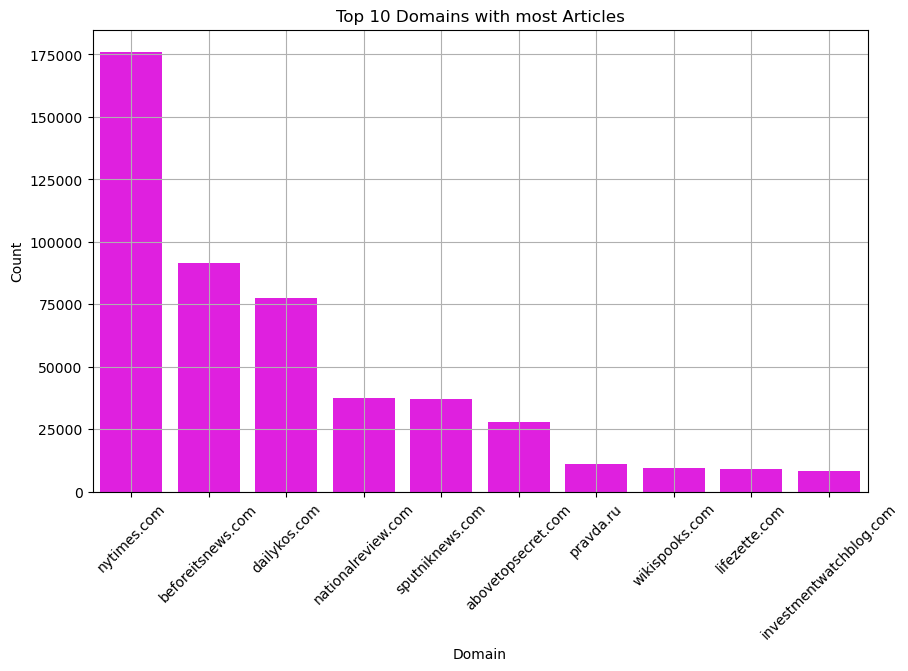

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

type_order = domain_counts_top10.index

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='domain', order=type_order, color='fuchsia')

plt.title("Top 10 Domains with most Articles") 
plt.xlabel("Domain")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [31]:
domain_counts_low10 = df['domain'].value_counts().nsmallest(10)

print(domain_counts_low10)

domain
thestatelyharold.com    1
channel18news.com       1
speld.nl                1
geopolmonitor.com       1
ushealthylife.com       1
yesimright.com          1
bighairynews.com        1
proamericanews.com      1
goneleft.com            1
flashnewscorner.com     1
Name: count, dtype: int64


In [32]:
top_10_domains_df = df[df['domain'].isin(domain_counts_top10.index)]

print(top_10_domains_df)

             type              domain  \
0       political  nationalreview.com   
1            fake   beforeitsnews.com   
3        reliable         nytimes.com   
6       political        dailykos.com   
7       political        dailykos.com   
...           ...                 ...   
803117   reliable         nytimes.com   
803118   reliable         nytimes.com   
803119  political  nationalreview.com   
803121  political  nationalreview.com   
803122       bias     sputniknews.com   

                                                  content  category  
0       plu one articl googl plu thank ali alfoneh ass...  reliable  
1       cost best senat bank committe jp morgan buy <n...      fake  
3       julia geist ask draw pictur comput scientist l...  reliable  
6       disclaim gener inform law topic noth diari con...  reliable  
7       new report identifi <num> epicent worldwid cha...  reliable  
...                                                   ...       ...  
803117  spot dish

In [33]:
low_10_domains_df = df[df['domain'].isin(domain_counts_low10.index)]

print(low_10_domains_df)

             type                domain  \
193479       fake      bighairynews.com   
277627       fake   flashnewscorner.com   
396314       fake          goneleft.com   
480482       fake    proamericanews.com   
587081  political     geopolmonitor.com   
594878     satire  thestatelyharold.com   
600643       fake        yesimright.com   
602758       fake     channel18news.com   
640046       fake     ushealthylife.com   
666080     satire              speld.nl   

                                                  content  category  
193479  vatican citi rome world news bureau pope franc...      fake  
277627  isi run rampant longer care rememb terrorist g...      fake  
396314  stun stun unpreced attack littl half countri v...      fake  
480482  wall protect support biker trump defend trump ...      fake  
587081  syrian troop back heavi airstrik artilleri too...  reliable  
594878  good skin reflect good health grow herb boost ...      fake  
600643  away comput holiday weekend 

In [34]:
top10_domain_assigned_types = top_10_domains_df.groupby('domain')['type'].unique()

print(top10_domain_assigned_types)

domain
abovetopsecret.com         [conspiracy]
beforeitsnews.com                [fake]
dailykos.com                [political]
investmentwatchblog.com          [bias]
lifezette.com               [clickbait]
nationalreview.com          [political]
nytimes.com                  [reliable]
pravda.ru                        [bias]
sputniknews.com                  [bias]
wikispooks.com             [conspiracy]
Name: type, dtype: object


In [35]:
low10_domain_assigned_types = low_10_domains_df.groupby('domain')['type'].unique()

print(low10_domain_assigned_types)

domain
bighairynews.com             [fake]
channel18news.com            [fake]
flashnewscorner.com          [fake]
geopolmonitor.com       [political]
goneleft.com                 [fake]
proamericanews.com           [fake]
speld.nl                   [satire]
thestatelyharold.com       [satire]
ushealthylife.com            [fake]
yesimright.com               [fake]
Name: type, dtype: object


In [36]:
# Calculate the total count of articles for each domain
domain_counts = df['domain'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 domains
top_10_domains_df = df[df['domain'].isin(domain_counts.index)]

# Group the filtered DataFrame by 'domain' and the categorization column and count the occurrences
domain_type_counts = top_10_domains_df.groupby(['domain', 'category']).size().unstack(fill_value=0)

# Calculate the total count of articles for each domain
domain_counts = domain_type_counts.sum(axis=1)

# Calculate the percentage distribution for each domain
percentage_distribution = domain_type_counts.div(domain_counts, axis=0) * 100

print(percentage_distribution)

category                  fake  reliable
domain                                  
abovetopsecret.com       100.0       0.0
beforeitsnews.com        100.0       0.0
dailykos.com               0.0     100.0
investmentwatchblog.com  100.0       0.0
lifezette.com              0.0     100.0
nationalreview.com         0.0     100.0
nytimes.com                0.0     100.0
pravda.ru                100.0       0.0
sputniknews.com          100.0       0.0
wikispooks.com           100.0       0.0
